In [1]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
import pandas as pd
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import catboost
from catboost import CatBoostClassifier
import optuna 
from sklearn.metrics import f1_score, roc_auc_score, precision_score, recall_score, classification_report
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_parquet('train.parquet')
val = pd.read_parquet('val.parquet')
test = pd.read_parquet('test.parquet')

In [3]:
target = 'cardio'

# FIRST

In [4]:
model = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=3, random_seed=42)
model.fit(train.drop(columns=target), train[target], eval_set = (val.drop(columns=target), val[target]), verbose=100)

0:	learn: 0.6683900	test: 0.6677290	best: 0.6677290 (0)	total: 66.3ms	remaining: 1m 6s
100:	learn: 0.5414919	test: 0.5346875	best: 0.5346875 (100)	total: 383ms	remaining: 3.41s
200:	learn: 0.5371909	test: 0.5333425	best: 0.5332876 (185)	total: 693ms	remaining: 2.75s
300:	learn: 0.5346589	test: 0.5330158	best: 0.5328914 (267)	total: 1.01s	remaining: 2.34s
400:	learn: 0.5326265	test: 0.5331368	best: 0.5328914 (267)	total: 1.31s	remaining: 1.96s
500:	learn: 0.5309659	test: 0.5330753	best: 0.5328914 (267)	total: 1.61s	remaining: 1.6s
600:	learn: 0.5295385	test: 0.5331863	best: 0.5328914 (267)	total: 1.9s	remaining: 1.26s
700:	learn: 0.5283491	test: 0.5332999	best: 0.5328914 (267)	total: 2.21s	remaining: 942ms
800:	learn: 0.5270651	test: 0.5336288	best: 0.5328914 (267)	total: 2.52s	remaining: 626ms
900:	learn: 0.5259863	test: 0.5336353	best: 0.5328914 (267)	total: 2.83s	remaining: 311ms
999:	learn: 0.5247860	test: 0.5338625	best: 0.5328914 (267)	total: 3.13s	remaining: 0us

bestTest = 0.532

In [5]:
print(f"TRAIN : {roc_auc_score(train[target], model.predict_proba(train.drop(columns=target))[:, 1])}")
print(f"VAL : {roc_auc_score(val[target], model.predict_proba(val.drop(columns=target))[:, 1])}")
print(f"TEST : {roc_auc_score(test[target], model.predict_proba(test.drop(columns=target))[:, 1])}")

TRAIN : 0.8067658650461678
VAL : 0.8084874468800496
TEST : 0.8035744329534356


In [6]:
print(f"TRAIN : {f1_score(train[target], model.predict(train.drop(columns=target)))}")
print(f"VAL : {f1_score(val[target], model.predict(val.drop(columns=target)))}")
print(f"TEST : {f1_score(test[target], model.predict(test.drop(columns=target)))}")

TRAIN : 0.7267535692116698
VAL : 0.728788549505681
TEST : 0.7299054373522459


In [7]:
print(classification_report(test[target], model.predict(test.drop(columns=target))))

              precision    recall  f1-score   support

           0       0.72      0.77      0.75      6988
           1       0.76      0.70      0.73      7012

    accuracy                           0.74     14000
   macro avg       0.74      0.74      0.74     14000
weighted avg       0.74      0.74      0.74     14000



In [8]:
res = permutation_importance(model, train.drop(columns=target), train[target], n_repeats=10, random_state=42)

In [9]:
new_features = [list(train.drop(columns=target).columns)[i] for i in res['importances_mean'].argsort()[::1] if res['importances_mean'][i] - 2*res['importances_std'][i] > 0]



In [10]:
len(new_features)

10

In [11]:
new_features

['gender',
 'smoke',
 'gluc',
 'active',
 'height',
 'weight',
 'ap_lo',
 'age_new',
 'cholesterol',
 'ap_hi']

In [12]:
train

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_new
12641,2,168,84.0,130,90,1,1,1,1,1,1,61.673973
64529,2,170,85.0,120,80,1,1,0,0,1,0,58.249315
53586,1,165,74.0,120,80,1,1,0,0,1,0,56.832877
65927,2,168,62.0,100,70,1,1,0,0,1,0,56.668493
29241,2,176,66.0,120,80,1,1,0,0,1,0,54.317808
...,...,...,...,...,...,...,...,...,...,...,...,...
46553,1,156,66.0,150,70,1,1,0,0,1,1,58.293151
32117,2,174,77.0,130,90,2,1,0,0,0,0,54.372603
26862,2,164,81.0,160,90,1,3,1,0,1,1,58.501370
22146,1,157,72.0,130,80,3,1,0,0,1,1,57.926027


# SECOND

In [4]:
train = train.drop(columns='alco')
val = val.drop(columns='alco')
test = test.drop(columns='alco')

In [14]:
model = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=3, random_seed=42)
model.fit(train.drop(columns=target), train[target], eval_set = (val.drop(columns=target), val[target]), verbose=100)

0:	learn: 0.6685803	test: 0.6677762	best: 0.6677762 (0)	total: 5.4ms	remaining: 5.39s
100:	learn: 0.5413788	test: 0.5348582	best: 0.5348582 (100)	total: 315ms	remaining: 2.8s
200:	learn: 0.5375849	test: 0.5333030	best: 0.5333030 (200)	total: 615ms	remaining: 2.45s
300:	learn: 0.5350747	test: 0.5328624	best: 0.5328569 (298)	total: 936ms	remaining: 2.17s
400:	learn: 0.5330665	test: 0.5330509	best: 0.5328569 (298)	total: 1.24s	remaining: 1.86s
500:	learn: 0.5315298	test: 0.5330312	best: 0.5328569 (298)	total: 1.56s	remaining: 1.56s
600:	learn: 0.5300923	test: 0.5333415	best: 0.5328569 (298)	total: 1.88s	remaining: 1.25s
700:	learn: 0.5287928	test: 0.5333377	best: 0.5328569 (298)	total: 2.18s	remaining: 931ms
800:	learn: 0.5276112	test: 0.5333745	best: 0.5328569 (298)	total: 2.48s	remaining: 618ms
900:	learn: 0.5263575	test: 0.5335029	best: 0.5328569 (298)	total: 2.8s	remaining: 308ms
999:	learn: 0.5253727	test: 0.5335961	best: 0.5328569 (298)	total: 3.1s	remaining: 0us

bestTest = 0.53285

In [15]:
print(f"TRAIN : {roc_auc_score(train[target], model.predict_proba(train.drop(columns=target))[:, 1])}")
print(f"VAL : {roc_auc_score(val[target], model.predict_proba(val.drop(columns=target))[:, 1])}")
print(f"TEST : {roc_auc_score(test[target], model.predict_proba(test.drop(columns=target))[:, 1])}")

TRAIN : 0.8070102485609736
VAL : 0.808581541069139
TEST : 0.8035409838755444


In [16]:
print(f"TRAIN : {f1_score(train[target], model.predict(train.drop(columns=target)))}")
print(f"VAL : {f1_score(val[target], model.predict(val.drop(columns=target)))}")
print(f"TEST : {f1_score(test[target], model.predict(test.drop(columns=target)))}")

TRAIN : 0.726200840775105
VAL : 0.7293333333333333
TEST : 0.7312018946121965


In [17]:
print(classification_report(test[target], model.predict(test.drop(columns=target))))

              precision    recall  f1-score   support

           0       0.72      0.78      0.75      6988
           1       0.76      0.70      0.73      7012

    accuracy                           0.74     14000
   macro avg       0.74      0.74      0.74     14000
weighted avg       0.74      0.74      0.74     14000



In [18]:
importances = model.get_feature_importance(prettified=True)
a = importances.loc[importances['Importances'] >= 1, 'Feature Id'].tolist()

In [19]:
len(a)

7

In [20]:
a

['ap_hi', 'age_new', 'cholesterol', 'ap_lo', 'weight', 'height', 'gluc']

# THIRD

In [5]:
train = train.drop(columns=['gender', 'smoke', 'active'])
val = val.drop(columns=['gender', 'smoke', 'active'])
test = test.drop(columns=['gender', 'smoke', 'active'])

In [22]:
model = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=3, random_seed=42)
model.fit(train.drop(columns=target), train[target], eval_set = (val.drop(columns=target), val[target]), verbose=100)

0:	learn: 0.6681747	test: 0.6674642	best: 0.6674642 (0)	total: 3.67ms	remaining: 3.67s
100:	learn: 0.5426723	test: 0.5348600	best: 0.5348600 (100)	total: 285ms	remaining: 2.54s
200:	learn: 0.5390467	test: 0.5338034	best: 0.5337639 (187)	total: 594ms	remaining: 2.36s
300:	learn: 0.5368516	test: 0.5335684	best: 0.5335627 (288)	total: 903ms	remaining: 2.1s
400:	learn: 0.5350533	test: 0.5336196	best: 0.5334999 (329)	total: 1.23s	remaining: 1.83s
500:	learn: 0.5333391	test: 0.5336959	best: 0.5334999 (329)	total: 1.54s	remaining: 1.53s
600:	learn: 0.5318991	test: 0.5338826	best: 0.5334999 (329)	total: 1.84s	remaining: 1.22s
700:	learn: 0.5305596	test: 0.5341924	best: 0.5334999 (329)	total: 2.16s	remaining: 923ms
800:	learn: 0.5293483	test: 0.5343656	best: 0.5334999 (329)	total: 2.47s	remaining: 614ms
900:	learn: 0.5282956	test: 0.5344799	best: 0.5334999 (329)	total: 2.78s	remaining: 306ms
999:	learn: 0.5273573	test: 0.5346326	best: 0.5334999 (329)	total: 3.09s	remaining: 0us

bestTest = 0.53

In [23]:
print(f"TRAIN : {roc_auc_score(train[target], model.predict_proba(train.drop(columns=target))[:, 1])}")
print(f"VAL : {roc_auc_score(val[target], model.predict_proba(val.drop(columns=target))[:, 1])}")
print(f"TEST : {roc_auc_score(test[target], model.predict_proba(test.drop(columns=target))[:, 1])}")

TRAIN : 0.805550948679335
VAL : 0.8082772069301734
TEST : 0.8007250572328213


In [24]:
print(f"TRAIN : {f1_score(train[target], model.predict(train.drop(columns=target)))}")
print(f"VAL : {f1_score(val[target], model.predict(val.drop(columns=target)))}")
print(f"TEST : {f1_score(test[target], model.predict(test.drop(columns=target)))}")

TRAIN : 0.725669416165069
VAL : 0.7305283324736571
TEST : 0.728548220351499


In [25]:
print(classification_report(test[target], model.predict(test.drop(columns=target))))

              precision    recall  f1-score   support

           0       0.72      0.77      0.75      6988
           1       0.76      0.70      0.73      7012

    accuracy                           0.74     14000
   macro avg       0.74      0.74      0.74     14000
weighted avg       0.74      0.74      0.74     14000



# LAST

In [92]:
def objective(trial):
    param = {
        "n_estimators": trial.suggest_int('n_estimators', 300, 2000),
        "learning_rate": trial.suggest_float('learning_rate', 0.01, 0.3),
        "objective": trial.suggest_categorical('objective', ["Logloss", "CrossEntropy"]),
        "depth": trial.suggest_int('depth', 3, 10),
        "l2_leaf_reg": trial.suggest_loguniform('l2_leaf_reg', 1e-2, 10),
        "colsample_bylevel": trial.suggest_float('colsample_bylevel', 0.01, 1.0),
        "min_child_samples": trial.suggest_float('min_child_samples', 100, 1000, step=100),
        "grow_policy": trial.suggest_categorical('grow_policy', ["SymmetricTree", "Depthwise", "Lossguide"]),
        "border_count": trial.suggest_categorical('border_count', [128, 256, 512, 1024]),
        "auto_class_weights": trial.suggest_categorical('auto_class_weight', [None, 'Balanced', 'SqrtBalanced'])
    }

    if param['objective'] == 'CrossEntropy':
        param['auto_class_weights'] = None

    model = CatBoostClassifier(**param, verbose = False, random_seed=42)

    model.fit(train.drop(columns=target), train[target], eval_set = (val.drop(columns=target), val[target]), early_stopping_rounds=50, plot=False)

    test_roc_auc = roc_auc_score(test[target], model.predict_proba(test.drop(columns=target))[:, 1])

    train_roc_auc = roc_auc_score(train[target], model.predict_proba(train.drop(columns=target))[:, 1])

    if train_roc_auc - test_roc_auc > 0.03:
        return 0
    else:
        return test_roc_auc

In [93]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=200)

[I 2025-04-07 15:04:14,992] A new study created in memory with name: no-name-df9945c4-b938-4a4d-9eb0-ec457027629a
/var/folders/_k/vxqnb8117qb_1tpg9p98mtyc0000gn/T/ipykernel_9428/1751210426.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "l2_leaf_reg": trial.suggest_loguniform('l2_leaf_reg', 1e-2, 10),
[I 2025-04-07 15:04:15,475] Trial 0 finished with value: 0.7984379790830407 and parameters: {'n_estimators': 1804, 'learning_rate': 0.19013097773031334, 'objective': 'Logloss', 'depth': 8, 'l2_leaf_reg': 0.03002973709872294, 'colsample_bylevel': 0.5497654134021661, 'min_child_samples': 400.0, 'grow_policy': 'SymmetricTree', 'border_count': 128, 'auto_class_weight': 'Balanced'}. Best is trial 0 with value: 0.7984379790830407.
/var/folders/_k/vxqnb8117qb_1tpg9p98mtyc0000gn/T/ipykernel_9428/1751210426.py:7: FutureWarning: suggest

In [94]:
print(study.best_params)

{'n_estimators': 1527, 'learning_rate': 0.11335114963766697, 'objective': 'Logloss', 'depth': 3, 'l2_leaf_reg': 0.625798747780737, 'colsample_bylevel': 0.9775420575021707, 'min_child_samples': 200.0, 'grow_policy': 'SymmetricTree', 'border_count': 128, 'auto_class_weight': 'Balanced'}


In [6]:
model = CatBoostClassifier(n_estimators = 1527, learning_rate = 0.11335114963766697, objective = 'Logloss', depth = 3, l2_leaf_reg = 0.625798747780737, colsample_bylevel = 0.9775420575021707, min_child_samples = 200.0, grow_policy = 'SymmetricTree', border_count = 128, auto_class_weights = 'Balanced', random_seed=42)
model.fit(train.drop(columns=target), train[target], eval_set = (val.drop(columns=target), val[target]), verbose=100)





0:	learn: 0.6646374	test: 0.6637285	best: 0.6637285 (0)	total: 64.8ms	remaining: 1m 38s
100:	learn: 0.5419672	test: 0.5346817	best: 0.5346800 (99)	total: 355ms	remaining: 5.01s
200:	learn: 0.5383030	test: 0.5336783	best: 0.5336727 (199)	total: 632ms	remaining: 4.17s
300:	learn: 0.5357518	test: 0.5336592	best: 0.5335710 (217)	total: 918ms	remaining: 3.74s
400:	learn: 0.5338113	test: 0.5340218	best: 0.5335710 (217)	total: 1.19s	remaining: 3.35s
500:	learn: 0.5321158	test: 0.5340386	best: 0.5335710 (217)	total: 1.47s	remaining: 3s
600:	learn: 0.5305344	test: 0.5344570	best: 0.5335710 (217)	total: 1.76s	remaining: 2.71s
700:	learn: 0.5291429	test: 0.5345272	best: 0.5335710 (217)	total: 2.05s	remaining: 2.41s
800:	learn: 0.5277713	test: 0.5348455	best: 0.5335710 (217)	total: 2.35s	remaining: 2.13s
900:	learn: 0.5266433	test: 0.5350424	best: 0.5335710 (217)	total: 2.63s	remaining: 1.83s
1000:	learn: 0.5255630	test: 0.5354385	best: 0.5335710 (217)	total: 2.94s	remaining: 1.54s
1100:	learn: 0.

In [12]:
print(f"TRAIN : {roc_auc_score(train[target], model.predict_proba(train.drop(columns=target))[:, 1])}")
print(f"VAL : {roc_auc_score(val[target], model.predict_proba(val.drop(columns=target))[:, 1])}")
print(f"TEST : {roc_auc_score(test[target], model.predict_proba(test.drop(columns=target))[:, 1])}")

TRAIN : 0.8043501242969948
VAL : 0.8082147767979913
TEST : 0.8016718253212824


In [8]:
print(f"TRAIN : {f1_score(train[target], model.predict(train.drop(columns=target)))}")
print(f"VAL : {f1_score(val[target], model.predict(val.drop(columns=target)))}")
print(f"TEST : {f1_score(test[target], model.predict(test.drop(columns=target)))}")

TRAIN : 0.7249690057029506
VAL : 0.7298774184020086
TEST : 0.7296257950007395


In [9]:
print(classification_report(test[target], model.predict(test.drop(columns=target))))

              precision    recall  f1-score   support

           0       0.72      0.77      0.75      6988
           1       0.76      0.70      0.73      7012

    accuracy                           0.74     14000
   macro avg       0.74      0.74      0.74     14000
weighted avg       0.74      0.74      0.74     14000



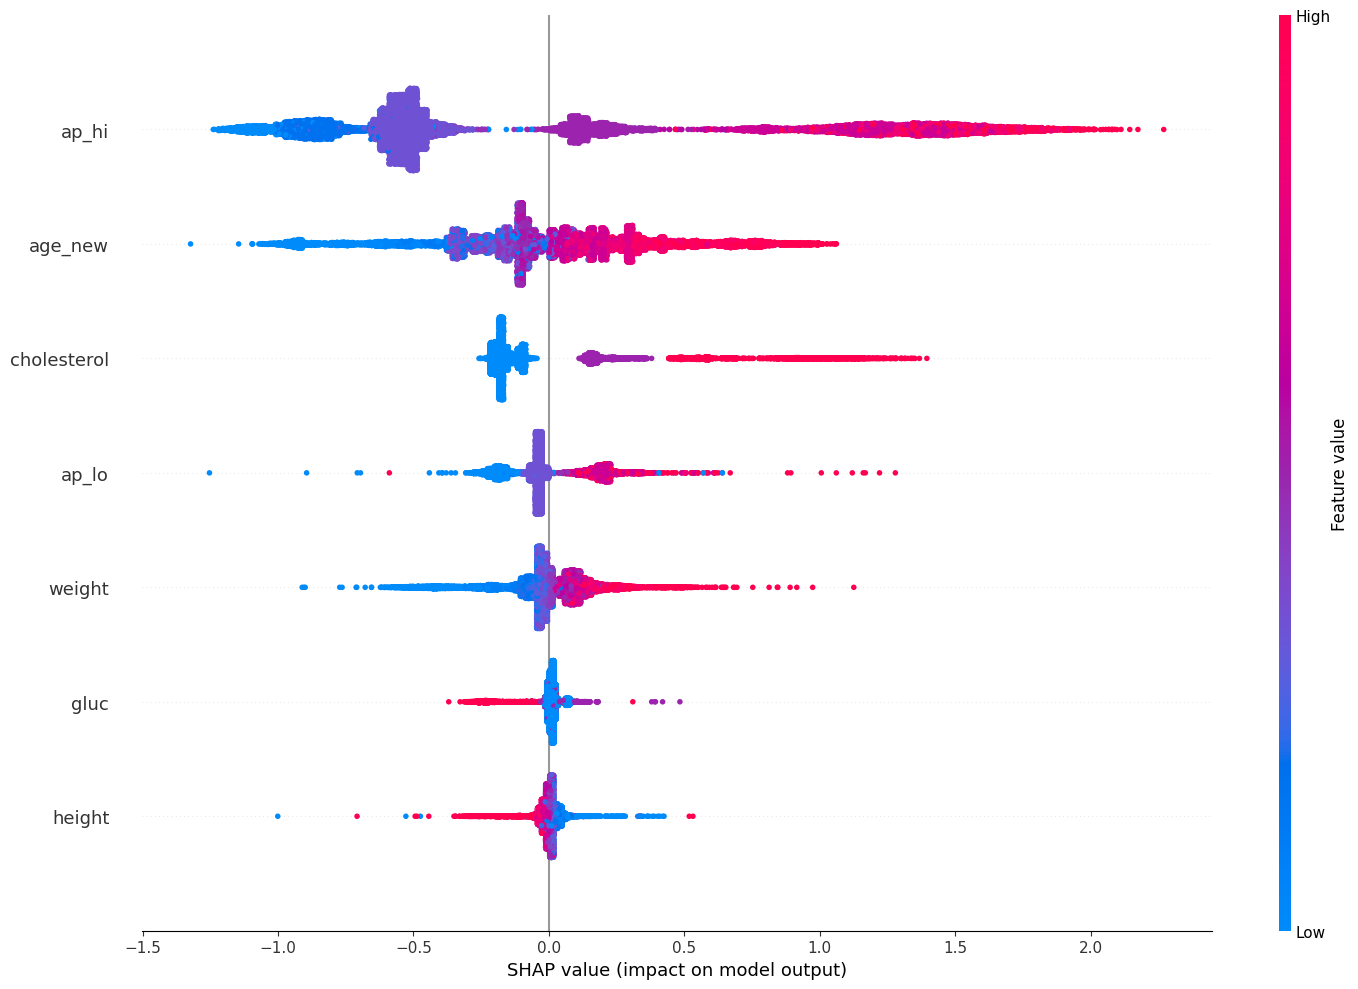

In [10]:
import shap
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(test.drop(columns=target))

shap.summary_plot(shap_values, test.drop(columns=target), plot_size=(15,10))

In [11]:
importances = model.get_feature_importance(prettified=True)
importances

,Feature Id,Importances
0,ap_hi,52.547054
1,age_new,19.715230
2,cholesterol,11.517713
3,ap_lo,6.775532
4,weight,5.420534
5,height,2.156967
6,gluc,1.866970


In [13]:
model.save_model('../models/final_model.cbm')

# with StandardScaler

In [25]:
x_train = train.drop(columns=target)
y_train = train[target]

x_val = val.drop(columns=target)
y_val = val[target]

x_test = test.drop(columns=target)
y_test = test[target]

In [26]:
scaler = StandardScaler()

In [27]:
x_train_scaled = scaler.fit_transform(x_train)
x_val_scaled = scaler.transform(x_val)
x_test_scaled = scaler.transform(x_test)

In [28]:
model = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=3, random_seed=42)
model.fit(x_train_scaled, y_train, eval_set = (x_val_scaled, y_val), verbose=100)

0:	learn: 0.6683900	test: 0.6677290	best: 0.6677290 (0)	total: 4.87ms	remaining: 4.86s
100:	learn: 0.5414919	test: 0.5346873	best: 0.5346873 (100)	total: 290ms	remaining: 2.58s
200:	learn: 0.5371909	test: 0.5333422	best: 0.5332873 (185)	total: 590ms	remaining: 2.34s
300:	learn: 0.5346589	test: 0.5330156	best: 0.5328912 (267)	total: 899ms	remaining: 2.09s
400:	learn: 0.5326265	test: 0.5331366	best: 0.5328912 (267)	total: 1.2s	remaining: 1.79s
500:	learn: 0.5309659	test: 0.5330751	best: 0.5328912 (267)	total: 1.5s	remaining: 1.49s
600:	learn: 0.5295385	test: 0.5331861	best: 0.5328912 (267)	total: 1.8s	remaining: 1.2s
700:	learn: 0.5283491	test: 0.5332997	best: 0.5328912 (267)	total: 2.1s	remaining: 898ms
800:	learn: 0.5270651	test: 0.5336286	best: 0.5328912 (267)	total: 2.41s	remaining: 599ms
900:	learn: 0.5259863	test: 0.5336351	best: 0.5328912 (267)	total: 2.71s	remaining: 298ms
999:	learn: 0.5247860	test: 0.5338623	best: 0.5328912 (267)	total: 3.01s	remaining: 0us

bestTest = 0.532891

In [30]:
print(f"TRAIN : {roc_auc_score(y_train, model.predict_proba(x_train_scaled)[:, 1])}")
print(f"VAL : {roc_auc_score(y_val, model.predict_proba(x_val_scaled)[:, 1])}")
print(f"TEST : {roc_auc_score(y_test, model.predict_proba(x_test_scaled)[:, 1])}")

TRAIN : 0.8067658650461678
VAL : 0.8084877530101519
TEST : 0.8035744329534356


In [31]:
print(f"TRAIN : {f1_score(y_train, model.predict(x_train_scaled))}")
print(f"VAL : {f1_score(y_val, model.predict(x_val_scaled))}")
print(f"TEST : {f1_score(y_test, model.predict(x_test_scaled))}")

TRAIN : 0.7267535692116698
VAL : 0.728788549505681
TEST : 0.7299054373522459


In [32]:
print(classification_report(y_test, model.predict(x_test_scaled)))

              precision    recall  f1-score   support

           0       0.72      0.77      0.75      6988
           1       0.76      0.70      0.73      7012

    accuracy                           0.74     14000
   macro avg       0.74      0.74      0.74     14000
weighted avg       0.74      0.74      0.74     14000



# with StandardScaler + Polynomial

In [48]:
x_train = train.drop(columns=target)
y_train = train[target]

x_val = val.drop(columns=target)
y_val = val[target]

x_test = test.drop(columns=target)
y_test = test[target]

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_val_scaled = scaler.transform(x_val)
x_test_scaled = scaler.transform(x_test)


pol = PolynomialFeatures(degree=2)

x_train_pol = pol.fit_transform(x_train_scaled)
x_val_pol = pol.transform(x_val_scaled)
x_test_pol = pol.transform(x_test_scaled)

In [49]:
model = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=3, random_seed=42)
model.fit(x_train_pol, y_train, eval_set = (x_val_pol, y_val), verbose=100)

0:	learn: 0.6670974	test: 0.6663494	best: 0.6663494 (0)	total: 5.08ms	remaining: 5.08s
100:	learn: 0.5398079	test: 0.5335438	best: 0.5335438 (100)	total: 399ms	remaining: 3.55s
200:	learn: 0.5340650	test: 0.5324351	best: 0.5324119 (198)	total: 803ms	remaining: 3.19s
300:	learn: 0.5299881	test: 0.5321434	best: 0.5320568 (287)	total: 1.19s	remaining: 2.75s
400:	learn: 0.5261082	test: 0.5321754	best: 0.5320568 (287)	total: 1.57s	remaining: 2.34s
500:	learn: 0.5227421	test: 0.5322759	best: 0.5320568 (287)	total: 1.95s	remaining: 1.94s
600:	learn: 0.5197879	test: 0.5326213	best: 0.5320568 (287)	total: 2.33s	remaining: 1.55s
700:	learn: 0.5167097	test: 0.5325738	best: 0.5320568 (287)	total: 2.71s	remaining: 1.16s
800:	learn: 0.5140816	test: 0.5330387	best: 0.5320568 (287)	total: 3.1s	remaining: 769ms
900:	learn: 0.5113662	test: 0.5332695	best: 0.5320568 (287)	total: 3.47s	remaining: 382ms
999:	learn: 0.5090155	test: 0.5335521	best: 0.5320568 (287)	total: 3.85s	remaining: 0us

bestTest = 0.53

In [50]:
print(f"TRAIN : {roc_auc_score(y_train, model.predict_proba(x_train_pol)[:, 1])}")
print(f"VAL : {roc_auc_score(y_val, model.predict_proba(x_val_pol)[:, 1])}")
print(f"TEST : {roc_auc_score(y_test, model.predict_proba(x_test_pol)[:, 1])}")

TRAIN : 0.8109983153202042
VAL : 0.8091732905567538
TEST : 0.8033347791879226


In [51]:
print(f"TRAIN : {f1_score(y_train, model.predict(x_train_pol))}")
print(f"VAL : {f1_score(y_val, model.predict(x_val_pol))}")
print(f"TEST : {f1_score(y_test, model.predict(x_test_pol))}")

TRAIN : 0.7291713173103157
VAL : 0.7294361096740818
TEST : 0.731181207062126


# with Polynomial

In [44]:
x_train = train.drop(columns=target)
y_train = train[target]

x_val = val.drop(columns=target)
y_val = val[target]

x_test = test.drop(columns=target)
y_test = test[target]

pol = PolynomialFeatures(degree=2)

x_train_pol = pol.fit_transform(x_train)
x_val_pol = pol.transform(x_val)
x_test_pol = pol.transform(x_test)

In [45]:
model = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=3, random_seed=42)
model.fit(x_train_pol, y_train, eval_set = (x_val_pol, y_val), verbose=100)

0:	learn: 0.6667389	test: 0.6657561	best: 0.6657561 (0)	total: 4.76ms	remaining: 4.75s
100:	learn: 0.5394883	test: 0.5335729	best: 0.5335729 (100)	total: 409ms	remaining: 3.64s
200:	learn: 0.5340909	test: 0.5323868	best: 0.5323725 (194)	total: 802ms	remaining: 3.19s
300:	learn: 0.5304007	test: 0.5327199	best: 0.5323725 (194)	total: 1.2s	remaining: 2.78s
400:	learn: 0.5272017	test: 0.5327620	best: 0.5323725 (194)	total: 1.59s	remaining: 2.38s
500:	learn: 0.5242704	test: 0.5329566	best: 0.5323725 (194)	total: 1.98s	remaining: 1.97s
600:	learn: 0.5218571	test: 0.5333533	best: 0.5323725 (194)	total: 2.37s	remaining: 1.57s
700:	learn: 0.5194713	test: 0.5335909	best: 0.5323725 (194)	total: 2.79s	remaining: 1.19s
800:	learn: 0.5171573	test: 0.5338224	best: 0.5323725 (194)	total: 3.2s	remaining: 795ms
900:	learn: 0.5147748	test: 0.5344203	best: 0.5323725 (194)	total: 3.6s	remaining: 396ms
999:	learn: 0.5124652	test: 0.5347863	best: 0.5323725 (194)	total: 3.99s	remaining: 0us

bestTest = 0.5323

In [46]:
print(f"TRAIN : {roc_auc_score(y_train, model.predict_proba(x_train_pol)[:, 1])}")
print(f"VAL : {roc_auc_score(y_val, model.predict_proba(x_val_pol)[:, 1])}")
print(f"TEST : {roc_auc_score(y_test, model.predict_proba(x_test_pol)[:, 1])}")

TRAIN : 0.8076737147012625
VAL : 0.8089044266923
TEST : 0.8031155642579847
